In [1]:
#importer les bibliothèque nécessaire
import pandas as pd 
import matplotlib.pyplot as plt
import openpyxl as xl
import numpy as np

In [2]:
#importer les fichiers 
erp = pd.read_excel("erp.xlsx")
liaison = pd.read_excel("liaison.xlsx")
web = pd.read_excel("web.xlsx")

# changer 'sku' par  'id_web'
web.columns.values[0:1] =["id_web"]
# effacer les duplicate et les NaN dans erp
erp.drop_duplicates(subset=["product_id"])
erp = erp.dropna(axis=0,subset=["product_id"])
# effacer les duplicate et les NaN dans liaison
liaison.drop_duplicates(subset=["product_id", "id_web"])
liaison = liaison.dropna(axis=0,subset=["product_id", "id_web"])
# effacer les duplicate et les NaN dans web
web.drop_duplicates(subset=["id_web"])
web = web.dropna(axis=0,subset=["id_web"])
web.drop(web.loc[web['post_type']!='product'].index, inplace=True)

C:\Users\utilisateur\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\utilisateur\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\utilisateur\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
#création d'un tableau avec tous les données
a = pd.merge(liaison, erp)
data = pd.merge(a, web)
#calcule de chiffre d'affaire de chaque produit et le mettre dans une colonne
data['chiffre_affaire'] = data["price"]*data["total_sales"]
data


,product_id,id_web,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,chiffre_affaire
0,3847,15298,1,24.2,0,outofstock,0,0,0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,145.2
1,3849,15296,1,34.3,0,outofstock,0,0,0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
2,3850,15300,1,20.8,0,outofstock,0,0,0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
3,4032,19814,1,14.1,0,outofstock,0,0,0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,42.3
4,4039,19815,1,46.0,0,outofstock,0,0,0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,6930,16135,1,8.4,83,instock,0,0,0,0.0,...,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,42.0
710,7023,15891,1,27.5,15,instock,0,0,0,0.0,...,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
711,7025,15887,1,69.0,2,instock,0,0,0,0.0,...,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
712,7247,13127-1,1,54.8,23,instock,0,0,0,0.0,...,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0


In [4]:
#calcule et affichage de le chiffre d'affaire totale
print("le total de chiffre d’affaire réalisé est: "+ str(data.chiffre_affaire.sum()) +" euro")

le total de chiffre d’affaire réalisé est: 70568.6 euro


In [5]:
#création d'un tableau avec le prix , nom et zscore
data01 = data[["post_name","price"]]
cols = list(data01.columns)
cols.remove('post_name')
data_1 = data01[cols]
for col in cols:
    col_zscore = col + '_zscore'
    data_1[col_zscore] = (data01[col] - data01[col].mean())/data01[col].std(ddof=0)

data01["price_zscore"]= data_1["price_zscore"]
data01

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_10896\565118346.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data01["price_zscore"]= data_1["price_zscore"]


,post_name,price,price_zscore
0,pierre-jean-villa-saint-joseph-preface-2018,24.2,-0.298410
1,pierre-jean-villa-saint-joseph-tilde-2017,34.3,0.065016
2,pierre-jean-villa-croze-hermitage-accroche-coe...,20.8,-0.420752
3,pierre-jean-villa-igp-gamine-2018,14.1,-0.661837
4,pierre-jean-villa-cote-rotie-carmina-2017,46.0,0.486015
...,...,...,...
709,mouthes-le-bihan-aime-chai-2015,8.4,-0.866939
710,camin-larredya-jurancon-sec-la-virada-2018,27.5,-0.179667
711,jamet-cote-rotie-fructus-voluptas-2018,69.0,1.313620
712,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,54.8,0.802664


C:\Users\utilisateur\AppData\Local\Temp\ipykernel_10896\3298852704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data01["Z"] = np.where(data01['price_zscore']<2, 1, 0)


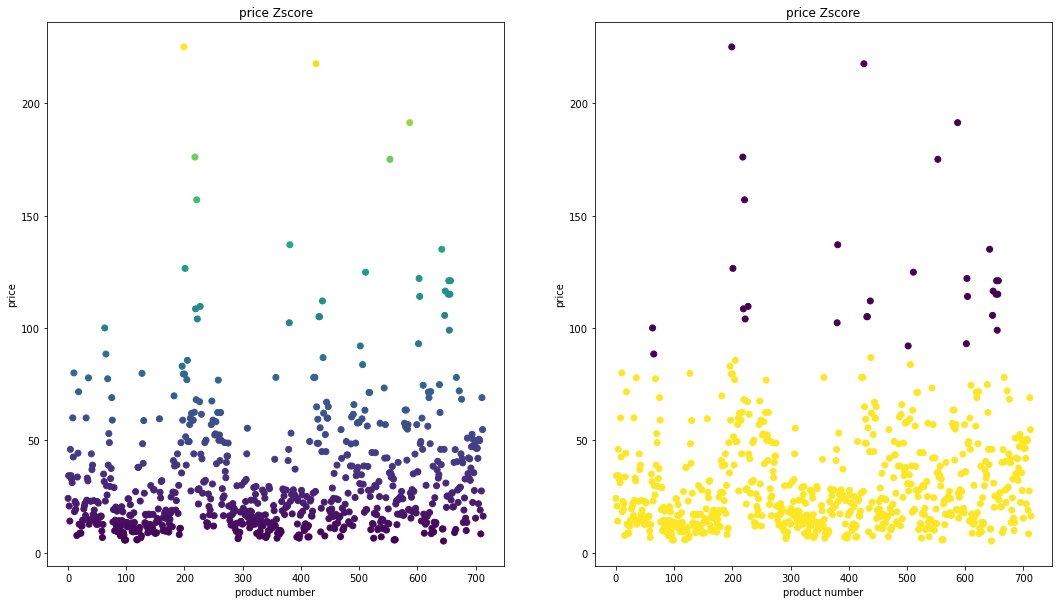

In [6]:
#affichage du figure
data01["Z"] = np.where(data01['price_zscore']<2, 1, 0)
figure = plt.figure(figsize = (18, 10))
plt.subplot(1, 2, 2)
plt.scatter( x = data01.index, y = data01.price, c = data01.Z)
plt.xlabel("product number") ; plt.ylabel("price");
plt.title("price Zscore")
plt.subplot(1, 2, 1)
plt.scatter( x = data01.index, y = data01.price, c = data01.price_zscore)
plt.xlabel("product number") ; plt.ylabel("price");
plt.title("price Zscore")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x24448001d90>,
 'caps': [<matplotlib.lines.Line2D at 0x24448013430>,
 'boxes': [<matplotlib.lines.Line2D at 0x24448001ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x24448013910>],
 'fliers': [<matplotlib.lines.Line2D at 0x24448013be0>],
 'means': []}

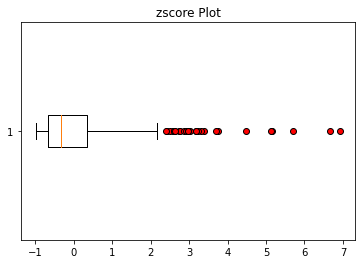

In [7]:
#affichage du boxplot
red_round = dict(markerfacecolor='r', marker='o')
fig1, ax1 = plt.subplots()
ax1.set_title('zscore Plot')
ax1.boxplot(data01.price_zscore, flierprops=red_round, vert=False, whis=2)